In [1]:
import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [2]:
from scripts.load_data import load_data_from_postgres, load_data_using_sqlalchemy

In [3]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\AII\Desktop\telecommunication-data-analysis\scripts\load_data.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Successfully loaded the data


In [4]:
telecom_data = df.copy()
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


**preprocessing**

In [5]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
from src.utils import missing_values_table, convert_bytes_to_megabytes,ms_to_sec
missing_values_df = missing_values_table(telecom_data)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [8]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [10]:
telecom_data['Start sec'] = telecom_data['Start ms'].apply(ms_to_sec)
telecom_data['End sec'] = telecom_data['End ms'].apply(ms_to_sec)
telecom_data['Dur. (sec)'] = telecom_data['Dur. (ms)'].apply(ms_to_sec)
telecom_data['Avg RTT DL (sec)'] = telecom_data['Avg RTT DL (ms)'].apply(ms_to_sec)
telecom_data['Avg RTT UL (sec)'] = telecom_data['Avg RTT UL (ms)'].apply(ms_to_sec)
telecom_data['Activity Duration DL (sec)'] = telecom_data['Activity Duration DL (ms)'].apply(ms_to_sec)
telecom_data['Activity Duration UL (sec)'] = telecom_data['Activity Duration UL (ms)'].apply(ms_to_sec)

In [18]:
telecom_data['HTTP UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'HTTP UL (Bytes)')
telecom_data['Social Media UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Social Media UL (Bytes)')
telecom_data['Google UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Google UL (Bytes)')
telecom_data['Youtube UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Youtube UL (Bytes)')
telecom_data['Netflix UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Netflix UL (Bytes)')
telecom_data['Gaming UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Gaming UL (Bytes)')
telecom_data['Total UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Total UL (Bytes)')
telecom_data['HTTP DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'HTTP DL (Bytes)')
telecom_data['Social Media DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Social Media DL (Bytes)')
telecom_data['Google DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Google DL (Bytes)')
telecom_data['Youtube DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Youtube DL (Bytes)')
telecom_data['Netflix DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Netflix DL (Bytes)')
telecom_data['Gaming DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Gaming DL (Bytes)')
telecom_data['Total DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Total DL (Bytes)')
telecom_data['TCP DL Retrans. Vol (MB)'] = convert_bytes_to_megabytes(telecom_data, 'TCP DL Retrans. Vol (Bytes)')
telecom_data['TCP UL Retrans. Vol (MB)'] = convert_bytes_to_megabytes(telecom_data, 'TCP UL Retrans. Vol (Bytes)')
telecom_data['Other DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Other DL (Bytes)')
telecom_data['Other UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Other UL (Bytes)')
telecom_data['Email DL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Email DL (Bytes)')
telecom_data['Email UL (MB)'] = convert_bytes_to_megabytes(telecom_data, 'Email UL (Bytes)')

print(telecom_data)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [12]:
# Group by handset and count the number of occurrences
top_handsets = telecom_data['Handset Type'].value_counts().head(10)
print(top_handsets)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [13]:
# Group by manufacturer and count occurrences
top_manufacturers = telecom_data['Handset Manufacturer'].value_counts().head(3)
print(top_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [14]:
# Filter for top manufacturers and get top 5 handsets for each
for manufacturer in top_manufacturers.index:
    top_handsets_per_manufacturer = telecom_data[telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top handsets for {manufacturer}:")
    print(top_handsets_per_manufacturer)


Top handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


**User Behavior Analysis via Applications**

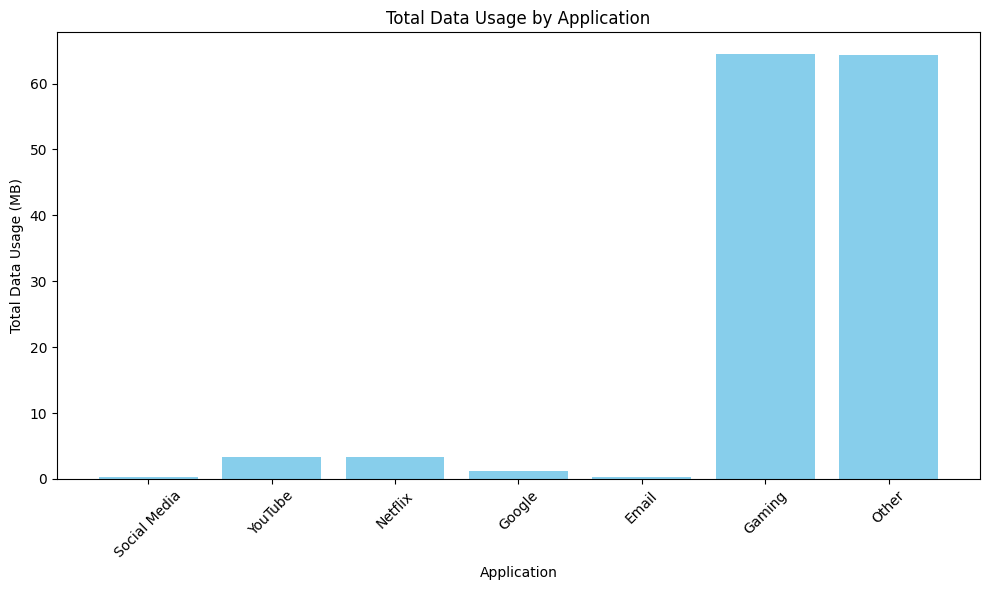

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'telecom_data' is your dataframe containing the xDR data

# Calculate total data usage (DL + UL) for each application
telecom_data['Social Media Total'] = telecom_data['Social Media DL (MB)'] + telecom_data['Social Media UL (MB)']
telecom_data['YouTube Total'] = telecom_data['Youtube DL (MB)'] + telecom_data['Youtube UL (MB)']
telecom_data['Netflix Total'] = telecom_data['Netflix DL (MB)'] + telecom_data['Netflix UL (MB)']
telecom_data['Google Total'] = telecom_data['Google DL (MB)'] + telecom_data['Google UL (MB)']
telecom_data['Email Total'] = telecom_data['Email DL (MB)'] + telecom_data['Email UL (MB)']
telecom_data['Gaming Total'] = telecom_data['Gaming DL (MB)'] + telecom_data['Gaming UL (MB)']
telecom_data['Other Total'] = telecom_data['Other DL (MB)']  + telecom_data['Other UL (MB)']

# Create a summary of total usage for each application
total_usage = {
    'Social Media': telecom_data['Social Media Total'].sum(),
    'YouTube': telecom_data['YouTube Total'].sum(),
    'Netflix': telecom_data['Netflix Total'].sum(),
    'Google': telecom_data['Google Total'].sum(),
    'Email': telecom_data['Email Total'].sum(),
    'Gaming': telecom_data['Gaming Total'].sum(),
    'Other': telecom_data['Other Total'].sum()
}

# Convert the dictionary to a dataframe for easy visualization
total_usage_telecom_data = pd.DataFrame(list(total_usage.items()), columns=['Application', 'Total Data Usage (MB)'])

# Plot the total data usage for each application
plt.figure(figsize=(10, 6))
plt.bar(total_usage_telecom_data['Application'], total_usage_telecom_data['Total Data Usage (MB)'], color='skyblue')
plt.title('Total Data Usage by Application')
plt.xlabel('Application')
plt.ylabel('Total Data Usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [26]:
# Key columns: IMSI (user), Dur. (s), DL/UL columns for different apps

# Step 1: Add a column for total data volume (DL + UL) per application for each session
telecom_data['Social Media Total'] = telecom_data['Social Media DL (MB)'] + telecom_data['Social Media UL (MB)']
telecom_data['YouTube Total'] = telecom_data['Youtube DL (MB)'] + telecom_data['Youtube UL (MB)']
telecom_data['Netflix Total'] = telecom_data['Netflix DL (MB)'] + telecom_data['Netflix UL (MB)']
telecom_data['Google Total'] = telecom_data['Google DL (MB)'] + telecom_data['Google UL (MB)']
telecom_data['Email Total'] = telecom_data['Email DL (MB)'] + telecom_data['Email UL (MB)']
telecom_data['Gaming Total'] = telecom_data['Gaming DL (MB)'] + telecom_data['Gaming UL (MB)']
telecom_data['Other Total'] = telecom_data['Other DL (MB)']  + telecom_data['Other UL (MB)']

# Step 2: Aggregate the data per user (IMSI)
user_behavior = telecom_data.groupby('IMSI').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),  # Assuming 'bearer idDur. (ms)' is session ID
    total_session_duration=('Dur. (sec)', 'sum'),              # Sum of session durations
    total_social_media_data=('Social Media Total', 'sum'),    # Total data volume for Social Media
    total_youtube_data=('YouTube Total', 'sum'),              # Total data volume for YouTube
    total_netflix_data=('Netflix Total', 'sum'),              # Total data volume for Netflix
    total_google_data=('Google Total', 'sum'),                # Total data volume for Google
    total_email_data=('Email Total', 'sum'),                  # Total data volume for Email
    total_gaming_data=('Gaming Total', 'sum'),                # Total data volume for Gaming
    total_other_data=('Other Total', 'sum'),                  # Total data volume for Other
)

# Calculate total download data per user
user_behavior['total_download_data'] = telecom_data.groupby('IMSI')[[
    'Social Media DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)', 
    'Google DL (MB)', 'Email DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)'
]].sum().sum(axis=1)

# Calculate total upload data per user
user_behavior['total_upload_data'] = telecom_data.groupby('IMSI')[[
    'Social Media UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)', 
    'Google UL (MB)', 'Email UL (MB)', 'Gaming UL (MB)', 'Other UL (MB)'
]].sum().sum(axis=1)


# Step 4: Display the aggregated user behavior data
user_behavior.head()


,number_of_xdr_sessions,total_session_duration,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data,total_download_data,total_upload_data
IMSI,,,,,,,,,,,
2.040471e+14,1,869.844,1.546088e-06,0.000041,0.000029,0.000009,0.000003,0.000043,0.000401,0.000468,0.000060
2.040808e+14,1,877.385,7.152240e-07,0.000012,0.000027,0.000010,0.000002,0.000178,0.000471,0.000663,0.000037
2.082001e+14,1,86.019,3.122781e-06,0.000020,0.000032,0.000002,0.000004,0.000009,0.000516,0.000531,0.000054
2.082001e+14,1,86.254,2.577104e-06,0.000026,0.000028,0.000014,0.000004,0.000344,0.000310,0.000694,0.000034
2.082001e+14,2,573.923,3.426716e-06,0.000014,0.000057,0.000012,0.000006,0.000918,0.001079,0.002018,0.000071


**Distribution of Total Data Usage**
* Histogram: To understand the distribution of total data usage across users.

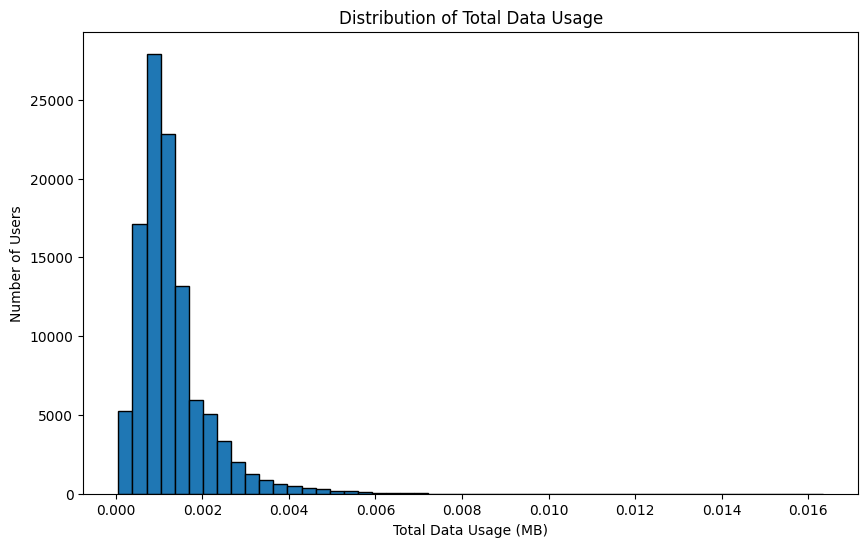

In [27]:
import matplotlib.pyplot as plt

# Plot histogram of total data usage
plt.figure(figsize=(10, 6))
plt.hist(user_behavior['total_download_data'] + user_behavior['total_upload_data'], bins=50, edgecolor='k')
plt.xlabel('Total Data Usage (MB)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Data Usage')
plt.show()


**Average Session Duration**
* Bar Chart: To compare average session duration across users or categories.

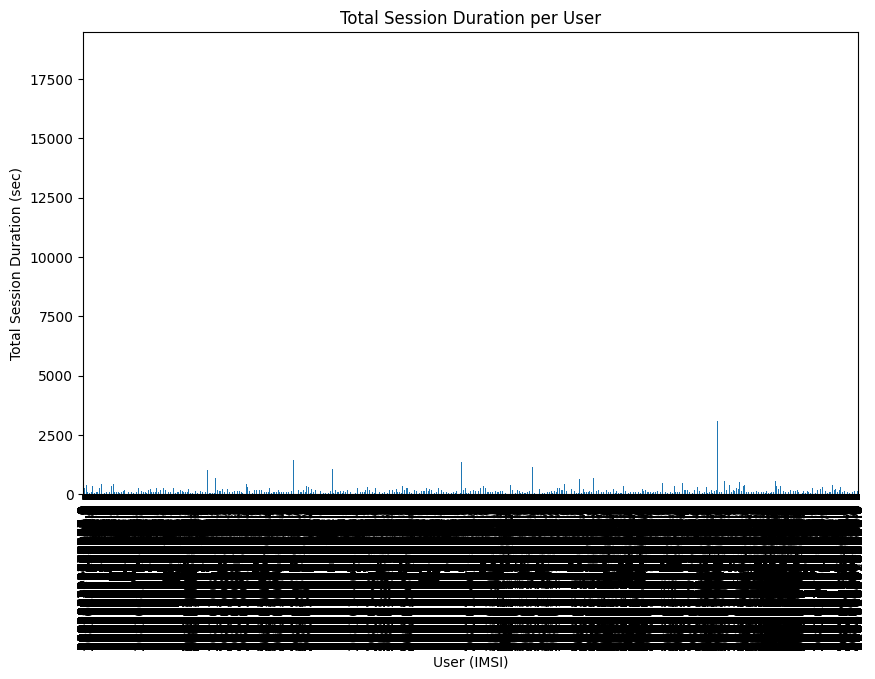

In [28]:
# Plot average session duration per user
plt.figure(figsize=(10, 6))
user_behavior['total_session_duration'].plot(kind='bar')
plt.xlabel('User (IMSI)')
plt.ylabel('Total Session Duration (sec)')
plt.title('Total Session Duration per User')
plt.show()


**Top Data-Intensive Users**
* Bar Chart: To highlight users with the highest total data usage.

<Figure size 1200x800 with 0 Axes>

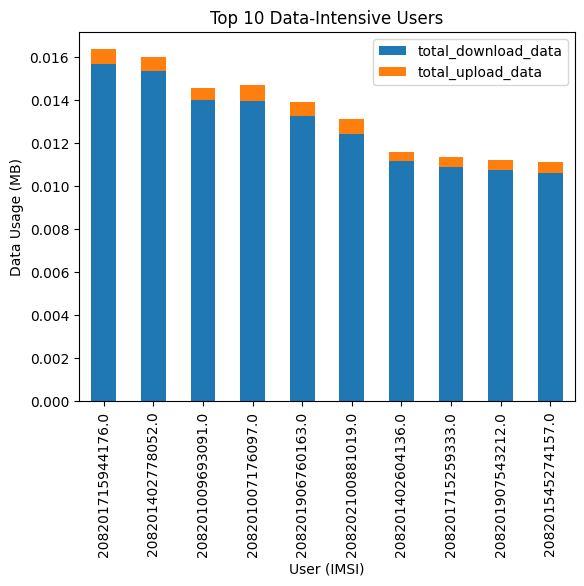

In [29]:
top_users = user_behavior.sort_values(by='total_download_data', ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_users[['total_download_data', 'total_upload_data']].plot(kind='bar', stacked=True)
plt.xlabel('User (IMSI)')
plt.ylabel('Data Usage (MB)')
plt.title('Top 10 Data-Intensive Users')
plt.show()


**Data Usage by Application**
* Pie Chart: To visualize the proportion of data used by different applications

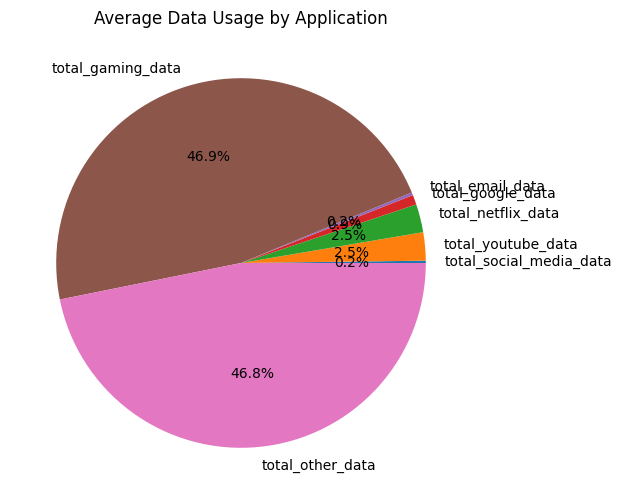

In [30]:
# Calculate average data usage by application
avg_data_by_app = user_behavior[['total_social_media_data', 'total_youtube_data', 'total_netflix_data',
                                 'total_google_data', 'total_email_data', 'total_gaming_data', 'total_other_data']].mean()

plt.figure(figsize=(10, 6))
avg_data_by_app.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Data Usage by Application')
plt.ylabel('')  # Hide y-label
plt.show()


**Session Duration vs. Data Usage**
* Scatter Plot: To explore the relationship between session duration and total data usage.

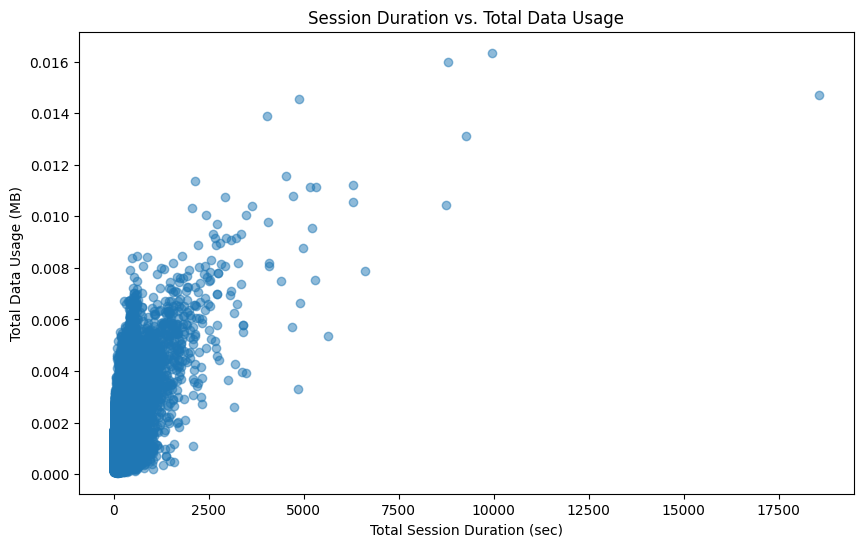

In [31]:

plt.figure(figsize=(10, 6))
plt.scatter(user_behavior['total_session_duration'], 
            user_behavior['total_download_data'] + user_behavior['total_upload_data'], alpha=0.5)
plt.xlabel('Total Session Duration (sec)')
plt.ylabel('Total Data Usage (MB)')
plt.title('Session Duration vs. Total Data Usage')
plt.show()
